In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0, '/Users/gabe/projects/recombination/src')
from RecTools import *

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

ln10e10As = 3.047
As = np.exp(ln10e10As)/(10**10)

cosmo_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "sigma8": 0.8102,
    "H0": 67.66
    #"A_s": As
}

#same as defaults
noise_parameters = {'beam_FWHM_143_arcmin' : 7.3,
                        'beam_FWHM_217_arcmin' : 4.90,
                        'weight_inv_T_143' : 0.36e-4,
                        'weight_inv_P_143' : 1.61e-4,
                        'weight_inv_T_217' : 0.78e-4,
                        'weight_inv_P_217' : 3.25e-4,
                        'fsky' : 0.8,
                        'use_143' : True,
                        'use_217' : True
                        }  

recombination_params = {"zmin_pert": 300,
                        "zmax_pert": 2500,
                        "ll_max": 2500,
                        "linear_sampling": 2*20000,
                        "Npert": 80,
                        "noise_params": noise_parameters
                        }

basename = "NewTest"

In [2]:
generate_new = False

if generate_new:
    RecHistory = RecFisher(cosmo_params, recombination_params, basename)
    path = RecHistory.filebase
    RecHistory.compute_Fisher()
else:
    path = "/Users/gabe/projects/recombination/data/May19.NewTest.0"

In [3]:
Fisher = FisherData(path)

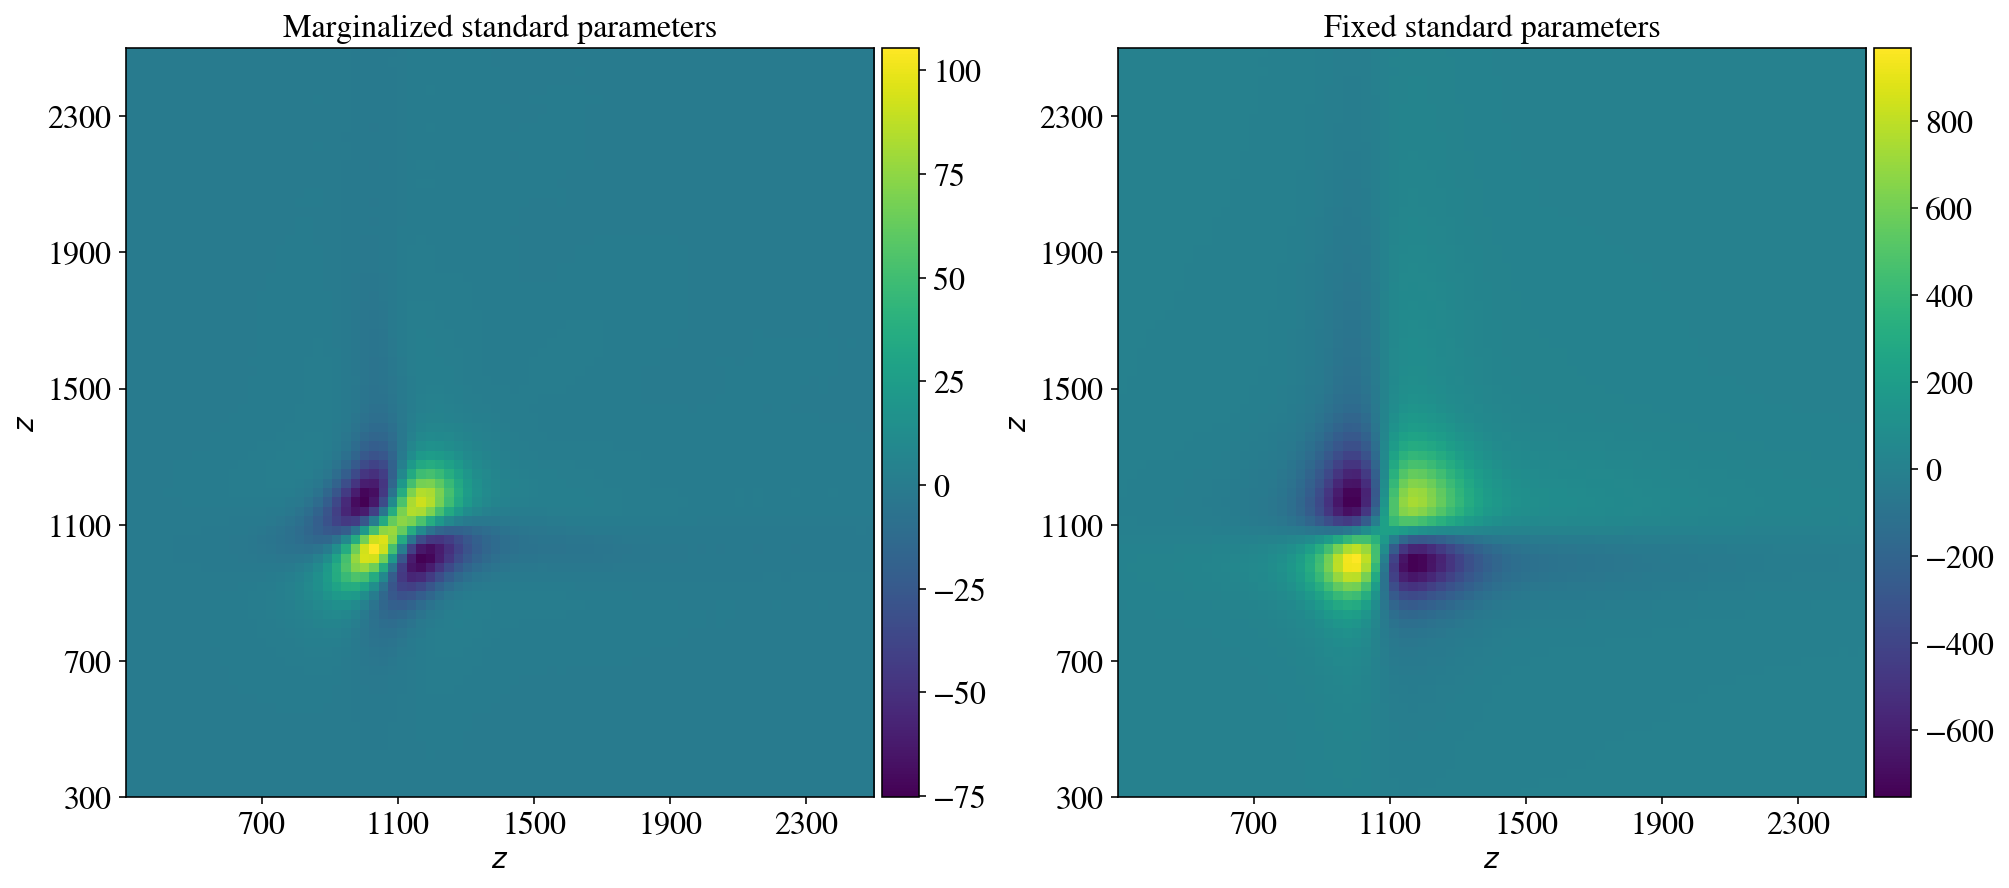

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
scale=2
vsize = scale*8
hsize = scale*10

fig,ax = plt.subplots(1,2, figsize=(vsize,hsize))

extent = [Fisher.zmin , Fisher.zmax, Fisher.zmin, Fisher.zmax]
xtick_list = [700, 1100, 1500, 1900, 2300]
ytick_list = [300, 700, 1100, 1500, 1900, 2300]

m=ax[0].imshow(Fisher.Fisher_marginalized, origin='lower', extent=extent, cmap=cm.viridis)

divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(m, cax=cax1)
ax[0].set_xticks(xtick_list)
ax[0].set_yticks(ytick_list)
ax[0].set_xlabel("$z$", fontsize=14)
ax[0].set_ylabel("$z$", fontsize=14)

ax[0].set_title("Marginalized standard parameters", fontsize=16)

m=ax[1].imshow(Fisher.Fisher_fixed, origin='lower', extent=extent, cmap=cm.viridis)

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(m, cax=cax2)
ax[1].set_xticks(xtick_list)
ax[1].set_yticks(ytick_list)
ax[1].set_xlabel("$z$", fontsize=14)
ax[1].set_ylabel("$z$", fontsize=14)

ax[1].set_title("Fixed standard parameters", fontsize=16)

plt.subplots_adjust(wspace=0.25)

#plt.show()

[[ 1.04595925e-08 -2.76861074e-08  7.90892017e-08 -1.68673943e-08
  -1.44645965e-07  2.23079468e-05]
 [-2.76861074e-08  3.53821221e-07 -1.45022209e-06  2.87059753e-07
   1.61958768e-06 -1.78162503e-04]
 [ 7.90892017e-08 -1.45022209e-06  1.00988963e-05 -5.99326693e-07
  -5.55427974e-06  7.25147723e-04]
 [-1.68673943e-08  2.87059753e-07 -5.99326693e-07  2.98183040e-05
   2.55455638e-05 -1.29747894e-04]
 [-1.44645965e-07  1.61958768e-06 -5.55427974e-06  2.55455638e-05
   2.77425636e-05 -7.94289256e-04]
 [ 2.23079468e-05 -1.78162503e-04  7.25147723e-04 -1.29747894e-04
  -7.94289256e-04  1.02742904e-01]]
 $\Omega_b h^2$ & $\Omega_{cdm}h^2$ & $n_s$ & $\tau_{reio}$ & $\sigma_8$ & $H_0$ & \\ 

 1.046e-08 & -2.769e-08 & 7.909e-08 & -1.687e-08 & -1.446e-07 & 2.231e-05 \\ 
 -2.769e-08 & 3.538e-07 & -1.450e-06 & 2.871e-07 & 1.620e-06 & -1.782e-04 \\ 
 7.909e-08 & -1.450e-06 & 1.010e-05 & -5.993e-07 & -5.554e-06 & 7.251e-04 \\ 
 -1.687e-08 & 2.871e-07 & -5.993e-07 & 2.982e-05 & 2.555e-05 & -1.297e-

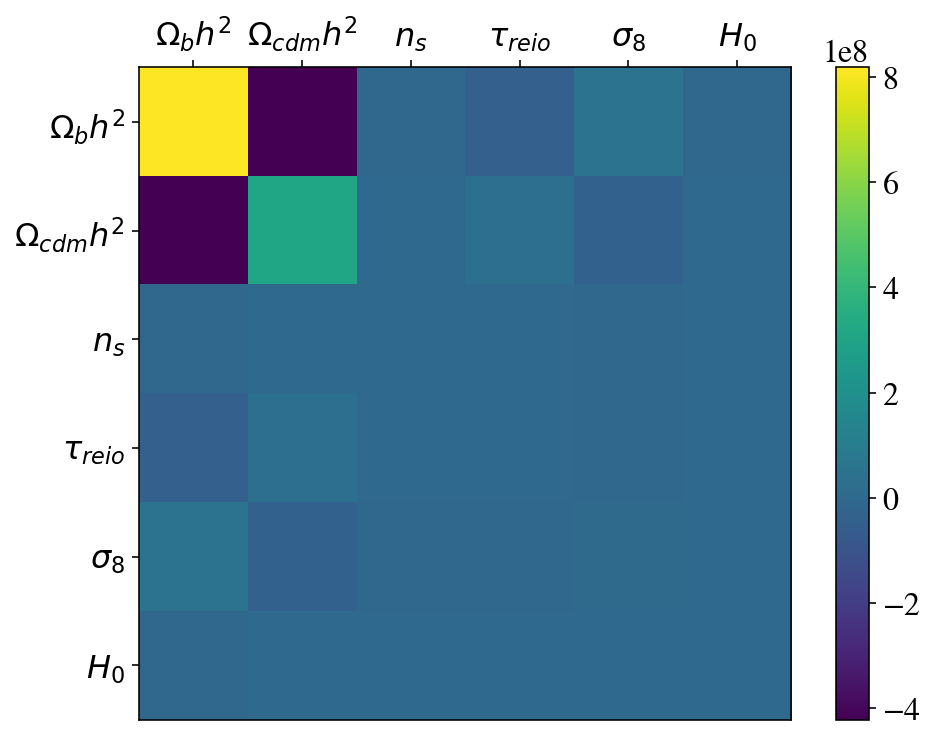

In [5]:
tick_label_list = ['$\Omega_b h^2$', '$\Omega_{cdm}h^2$', '$n_s$', '$\\tau_{reio}$', '$\sigma_8$', '$H_0$']

divider=6
standard_block = Fisher.get_standard_block()

standard_cov = np.linalg.pinv(standard_block)
print(standard_cov)

for s in tick_label_list:
    print(" {} &".format(s), end="")
print(" \\\\ \n")
for i,row in enumerate(standard_cov[:]):
    for val in row:
        if(val==row[-1]):
            print(" {:.3e} \\\\ \n".format(val), end='')
        else:
            print(" {:.3e} &".format(val), end='')

    #print(" \\\\ \n")

fig,ax = plt.subplots()

m = ax.imshow(standard_block, cmap=cm.viridis)

ax.set_xticks(np.arange(divider))
ax.set_yticks(np.arange(divider))

ax.set_xticklabels(tick_label_list)
ax.set_yticklabels(tick_label_list)

ax.xaxis.tick_top()

plt.colorbar(m)
plt.show()